![tox21](https://www.researchgate.net/profile/Sepp-Hochreiter/publication/320828461/figure/fig1/AS:562467181993985@1511114034491/Overview-of-the-Tox21-challenge-dataset.png)

# Benchmarks for TOX21

## Background

## Benchmarking


**The goal** of this benchmark is to 

## Description of readout 
- **Readouts**: 
- **Bioassay readout**: 
- **Optimization objective**: 

## Data resource: 
- **Reference**: 


## Train/test split



In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[2]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
root

PosixPath('/Users/lu.zhu/Documents/Codebase/ValenceLab/polaris-recipes')

In [3]:
# Get the owner and organization
org = "Graphium"
data_name = "tox21"
dataset_name = "tox21-v1"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org.lower(), type="organization")
owner

HubOwner(slug='graphium', external_id=None, type='organization')

In [4]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

### Load existing data

In [5]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [7]:
data_cols = [
    "NR-AR",
    "NR-AR-LBD",
    "NR-AhR",
    "NR-Aromatase",
    "NR-ER",
    "NR-ER-LBD",
    "NR-PPAR-gamma",
    "SR-ARE",
    "SR-ATAD5",
    "SR-HSE",
    "SR-MMP",
    "SR-p53",
]

mol_col = "smiles"

### Get the train/test splits

In [8]:
import torch

split_path = "gs://polaris-public/polaris-recipes/org-Graphium/tox21/data/raw/Tox21_random_splits.pt"
with dm.fs.fsspec.open(split_path) as f:
    split_dict = torch.load(f)

splits = tuple(split_dict.values())

### Check distribution of train/test set in the chemical space

  0%|          | 0/7831 [00:00<?, ?it/s]

[22:21:07] WARNING: not removing hydrogen atom without neighbors


'https://storage.googleapis.com/polaris-public/polaris-recipes/org-Graphium/tox21/figures/chemspace.png'

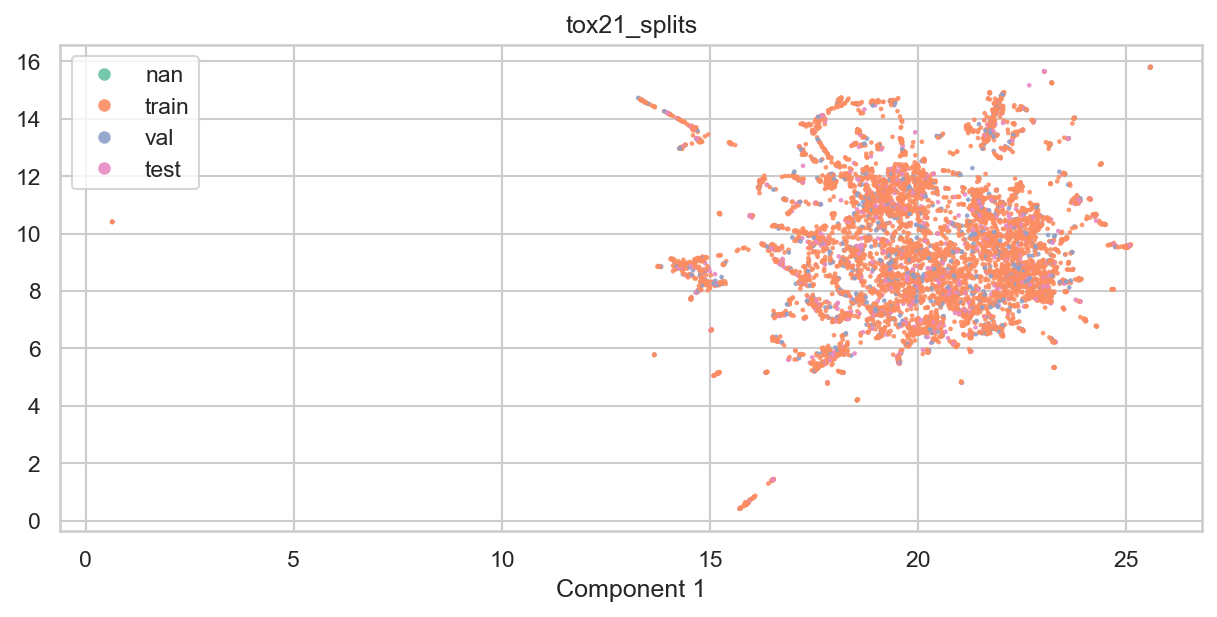

In [25]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(),
    train_test_dict={"tox21_splits": splits},
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"chemspace.png"))

## Define multitask benchmarks with the above defined split

In [10]:
tox21_splits = (splits[0] + splits[1], splits[2])

In [11]:
benchmark_version = "v1"
benchmark_name = f"tox21-{benchmark_version}"
readme_name = "org-Graphium/tox21/tox21_benchmark_readme.md"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"


benchmark = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "classification" for col in data_cols},
    input_cols=mol_col,
    split=tox21_splits,
    metrics=["mean_squared_error"],
    tags=["toxicity", "multitask"],
    description="A multitask classification benchmark for Tox21 challenge.",
    owner=owner,
    readme=load_readme(readme_name),
)
path = benchmark.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-16 22:28:47.041 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.
2024-07-16 22:28:47.054 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-Graphium/tox21/benchmarks/tox21-v1/benchmark.json


In [13]:
# Upload to hub
benchmark.upload_to_hub(owner=owner, access="private")

2024-07-16 22:29:01.761 | SUCCESS  | polaris.hub.client:upload_benchmark:675 - Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/graphium/tox21-v1


{'id': 'hzEH0pgG2Z54spalsQn50',
 'createdAt': '2024-07-17T02:29:01.716Z',
 'deletedAt': None,
 'name': 'tox21-v1',
 'slug': 'tox21-v1',
 'description': 'A multitask classification benchmark for Tox21 challenge.',
 'tags': ['toxicity', 'multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': 'dev',
 'readme': '## Background\n\n\n## Assay information\n\n\n## Description of readout:\n\n\n## Data resource\n\n',
 'state': 'ready',
 'ownerId': 'zMTB7lQiiukqEmLQF7EjT',
 'creatorId': 'NKnaHGybLqwSHcaMEHqfF',
 'datasetId': '60AuT0meGDMM9i4p8TVUw',
 'targetCols': ['NR-AR',
  'NR-AR-LBD',
  'NR-AhR',
  'NR-Aromatase',
  'NR-ER',
  'NR-ER-LBD',
  'NR-PPAR-gamma',
  'SR-ARE',
  'SR-ATAD5',
  'SR-HSE',
  'SR-MMP',
  'SR-p53'],
 'inputCols': ['smiles'],
 'md5Sum': '3199459ec88cee554769bdc3153ec551',
 'metrics': ['mean_squared_error'],
 'mainMetric': 'mean_squared_error',
 'split': [[2074,
   2270,
   4585,
   3687,
   4397,
   7357,
   4240,
   6608,
   609